In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.misc
import cv2
from pysrc.diffusion_map import diffusion_map
from sklearn.datasets import make_swiss_roll
from math import pi

# Task 1

## Part 1

#### Path setting

In [2]:
root_path = os.path.abspath(os.getcwd()) # This notebook should be at the root of our repo
dataset_path = os.path.join(root_path, "dataset")
output_path = os.path.join(root_path, "images")

#### Load raw data for PCA

In [3]:
pca_dataset = os.path.join(dataset_path, "pca_dataset.txt")
rawdata = np.loadtxt(pca_dataset)
n, d = rawdata.shape ## Number of date points and number of features

#### Center the date set

In [4]:
X = rawdata - np.mean(rawdata, axis=0)

#### Singular value decomposition

In [5]:
U, s, Vh = np.linalg.svd(X)

#### Compute "Energy" (Explained Variance)

In [6]:
energy = s**2/np.sum(s**2)

#### Plot the data

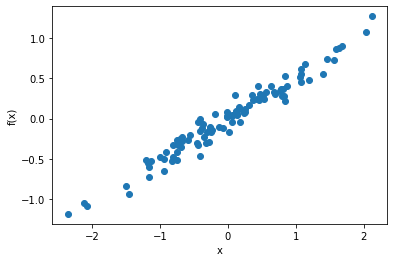

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

#### Plot the two principal components

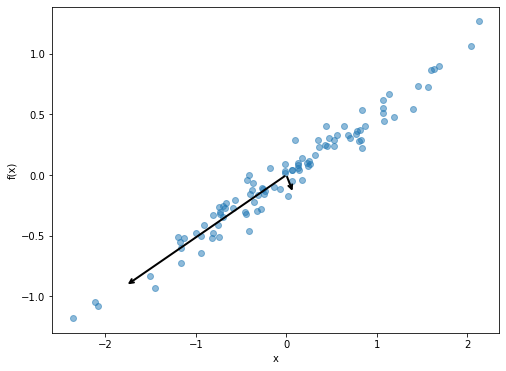

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel("x")
plt.ylabel("f(x)")
X_mean = np.mean(X, axis=0)

length_scale = 2
ax = plt.gca()
for energy_i, component in zip(energy, Vh):
    vec_length = energy_i**0.5
    v = component * length_scale * vec_length
    ax.annotate('', X_mean+v, X_mean, arrowprops=dict(arrowstyle="->", linewidth=2))
plt.show()

## Part 2

In [9]:
rawimage = scipy.misc.face(gray=True)

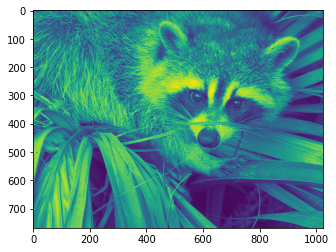

In [10]:
plt.imshow(rawimage)

#### Rescale the image

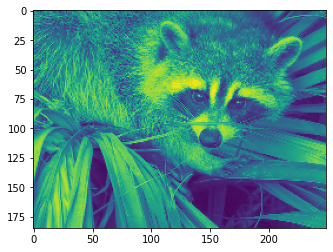

In [11]:
faceimage = cv2.resize(rawimage, dsize=(249, 185), interpolation=cv2.INTER_CUBIC)
plt.imshow(faceimage)

#### Reconstruction of the image

In [12]:
def show_image_with_pricipal_components(rawimage, numOfPC=None, output_name=None):
    X = rawimage - np.mean(rawimage, axis=0)
    n, d = X.shape
    numOfPC = numOfPC or min(n, d)
    
    U, s, Vh = np.linalg.svd(X)
    
    S = np.zeros((n, d))
    
    new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
    np.fill_diagonal(S, new_s)

    image = U @ S @ Vh
    
    plt.imshow(image)
    if output_name:
        plt.savefig(os.path.join(output_path, output_name))
        print("Figure saved as", os.path.join(output_path, output_name)+".png")
    plt.title("With {} principal components".format(numOfPC))
    plt.show()

##### (a) With all principal components

Figure saved as D:\GitHub\TUM\MLCMS-EX4-GroupK\images\task1_2_all.png


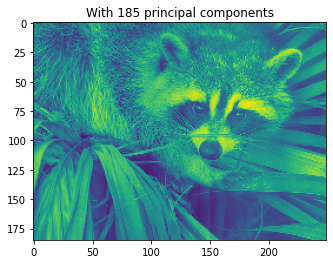

In [13]:
show_image_with_pricipal_components(faceimage, output_name="task1_2_all")

##### (b) With 120 principal components

Figure saved as D:\GitHub\TUM\MLCMS-EX4-GroupK\images\task1_2_120.png


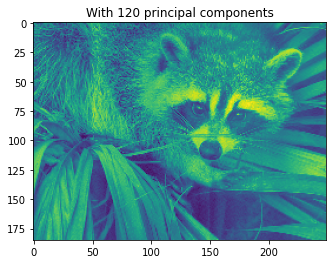

In [14]:
show_image_with_pricipal_components(faceimage, numOfPC=120, output_name="task1_2_120")

##### (c) With 50 principal components

Figure saved as D:\GitHub\TUM\MLCMS-EX4-GroupK\images\task1_2_50.png


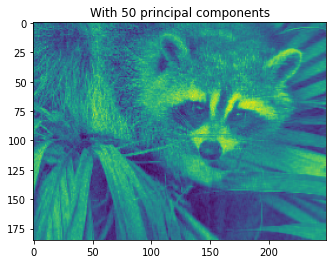

In [15]:
show_image_with_pricipal_components(faceimage, numOfPC=50, output_name="task1_2_50")

##### (d) With 10 principal components

Figure saved as D:\GitHub\TUM\MLCMS-EX4-GroupK\images\task1_2_10.png


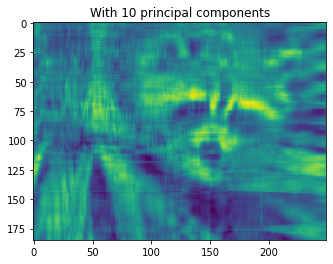

In [16]:
show_image_with_pricipal_components(faceimage, numOfPC=10, output_name="task1_2_10")

#### Finding the value of L at which "energy" is smaller than 1%

In [17]:
X = faceimage - np.mean(faceimage, axis=0)
n, d = X.shape
U, s, Vh = np.linalg.svd(X)

Get energy of each component, and the cumulated energy of first L principal components 

In [18]:
energy = s**2/np.sum(s**2)
cum_energy = np.cumsum(energy)

Check the values of L where the cumulated energy is greater than 99%

In [19]:
np.where(cum_energy>0.99)[0]+1

array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185], dtype=int64)

#### Comments:
At L>=120, the "energy" lost through truncation is smaller than 1%.

## Part 3

In [20]:
ped_rawdata = np.loadtxt(os.path.join(dataset_path, "data_DMAP_PCA_vadere.txt"))

### (a) Visualize the path of the first two pedestrians in the 2D space.

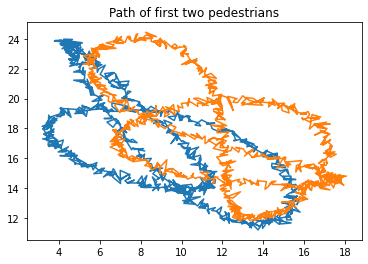

In [21]:
x1 = ped_rawdata[:,0]
y1 = ped_rawdata[:,1]
plt.plot(x1, y1)

x2 = ped_rawdata[:,2]
y2 = ped_rawdata[:,3]
plt.plot(x2, y2)

plt.title("Path of first two pedestrians")
plt.show()

Their paths have the similar shape.

### (b) PCA

In [22]:
X = ped_rawdata - ped_rawdata.mean(axis=0)
n, d = X.shape
U, s, Vh = np.linalg.svd(X)

#### We can observe the "shape" --manner of pedestrians' behaviour-- on the space taking the first two principal components as basis.

In [23]:
X_trans = numOfPC = 2

S = np.zeros((n, d))

new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
np.fill_diagonal(S, new_s)

X_trans = U @ S # Coordinates of the data points taking the two principal components as basis.

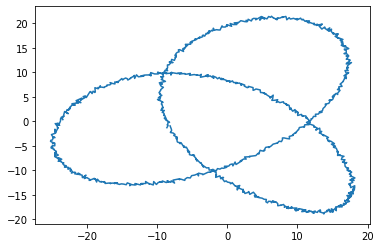

In [24]:
plt.plot(X_trans[:,0], X_trans[:,1])
plt.show()

#### Reconstruct the dataset using 2 components

In [25]:
numOfPC = 2

S = np.zeros((n, d))

new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
np.fill_diagonal(S, new_s)

X_proj = U @ S @ Vh

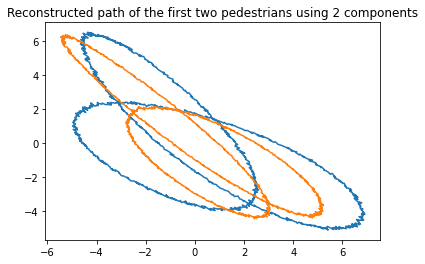

In [26]:
plt.plot(X_proj[:,0], X_proj[:,1])
plt.plot(X_proj[:,2], X_proj[:,3])
plt.title("Reconstructed path of the first two pedestrians using 2 components")
plt.show()

Get energy of each component, and the cumulated energy of first L principal components 

In [27]:
energy = s**2/np.sum(s**2)
cum_energy = np.cumsum(energy)

Check the values of L where the cumulated energy is greater than 99%

In [28]:
np.where(cum_energy>0.99)[0]+1

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

In [29]:
cum_energy

array([0.47330561, 0.84924642, 0.99713103, 0.99727174, 0.99740912,
       0.9975425 , 0.99767224, 0.99779965, 0.99792537, 0.99804438,
       0.99816037, 0.99827541, 0.99838897, 0.99850078, 0.99861018,
       0.99871873, 0.99882448, 0.99892824, 0.99902886, 0.99912732,
       0.99922498, 0.99931992, 0.99941206, 0.99950233, 0.99958945,
       0.99967542, 0.99976133, 0.99984473, 0.99992583, 1.        ])

In [48]:
energy

array([0.40476856, 0.32211594, 0.27311549])

#### Comments:
Two components are not enough to capture 90% of the energy.(why?) At least 3 cmoponents to capture 90% of the energy.

# To do: Why it is not enough?

Linnore's guess: The trajectories of pedestrians have similar shape, similar y starting coordinates but quite different x starting coordinates.

In [30]:
x1[0], x2[0]

(7.6827459032240775, 13.483824651241342)

In [31]:
y1[0], y2[0]

(16.590134940522535, 16.5163033623993)

In [32]:
ped_rawdata[0,:]

array([ 7.6827459 , 16.59013494, 13.48382465, 16.51630336,  4.09463337,
       12.94789591,  6.18520861, 14.05182738,  2.38475033, 11.90640152,
        2.97632587,  9.77760483, 14.60812295, 17.09726857, 14.83430839,
       18.04681822,  9.43799959, 16.67324233,  3.80880028,  8.46192526,
        7.61803753, 14.83000844,  5.79351695,  7.08561292, 13.16538662,
       18.27629557, 10.98046407, 17.09617936,  5.90601637, 15.32255011])

# Task 2

## Part 1

In [33]:
N = 1000
t = 2 * pi * np.arange(1, N+1) / (N+1)
x = np.column_stack((np.cos(t), np.sin(t)))

myDM1 = diffusion_map(x)
phi = myDM1.get_values_of_eigenfunctions(L=5)

C:\Users\pcfeo\anaconda3\envs\newtf\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pcfeo\anaconda3\envs\newtf\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pcfeo\anaconda3\envs\newtf\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pcfeo\anaconda3\envs\newtf\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\pcfeo\anaconda3\envs\newtf\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(

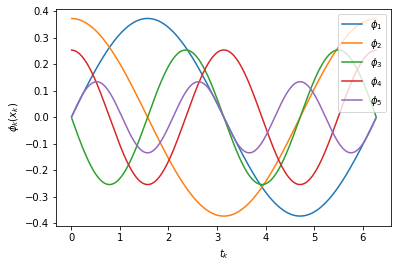

In [34]:
L = 5
for i in range(1, L+1):
    plt.plot(t, phi[:, i], label=r"$\phi_{}$".format(i))

plt.legend(loc="upper right")
plt.savefig(os.path.join(output_path, "task2_1"))
plt.xlabel("$t_k$")
plt.ylabel(r"$\phi_k(x_k)$")
plt.show()

### Todo: Bonus

The frequencies of the above plots should correspond to the strongest 5 frequencies identified in Fourier Analysis. 

## Part 2

#### N=5000

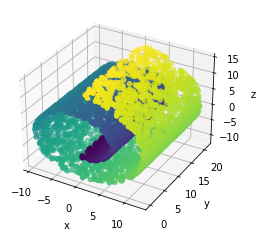

In [35]:
N = 5000
X, t = make_swiss_roll(N, random_state=118010142)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], "o", c = t)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

In [36]:
myDM2 = diffusion_map(X)
phi = myDM2.get_values_of_eigenfunctions(L=15)

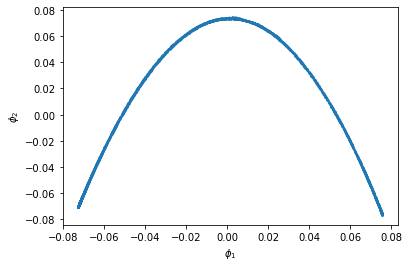

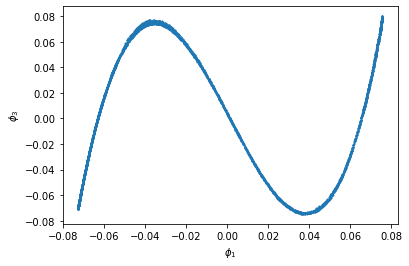

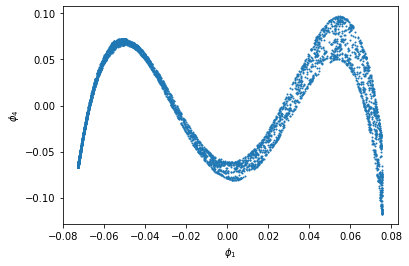

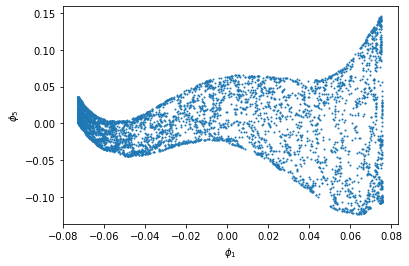

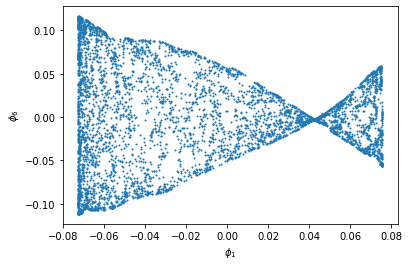

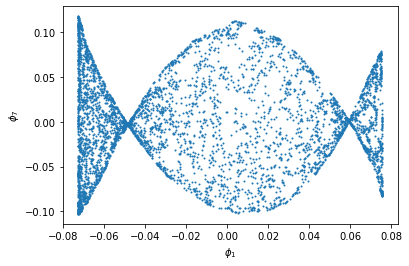

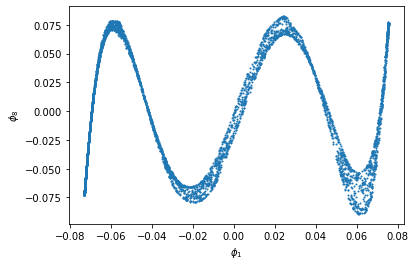

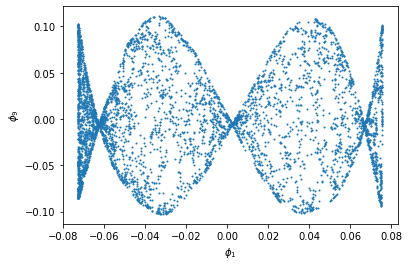

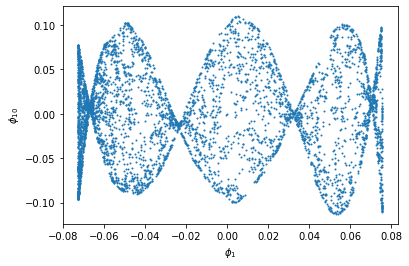

In [37]:
L = 10
plt.figure()
for i in range(2, L+1):
    plt.scatter(phi[:,1], phi[:,i], s=1)
    plt.xlabel(r"$\phi_1$")
    plt.ylabel(r"$\phi_{%d}$"%i)
    plt.savefig(os.path.join(output_path, "task2_2_5000_vs%d"%i))
    plt.show()

#### N=1000

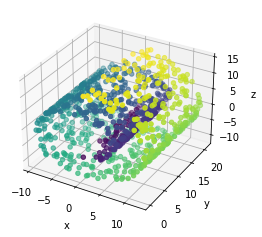

In [38]:
N = 1000
X, t = make_swiss_roll(N, random_state=118010142)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], "o", c = t)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

myDM3 = diffusion_map(X)
phi = myDM3.get_values_of_eigenfunctions(L=15)

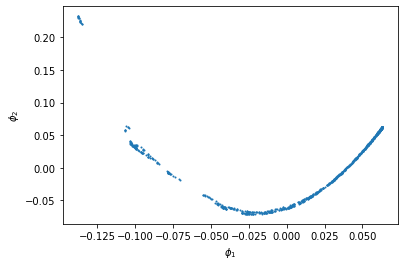

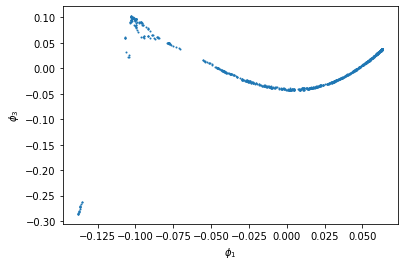

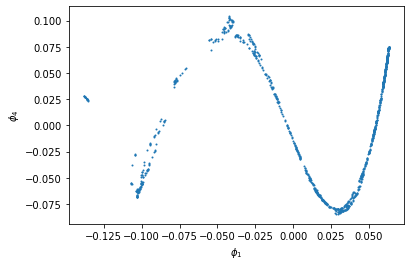

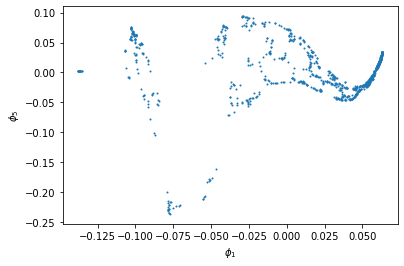

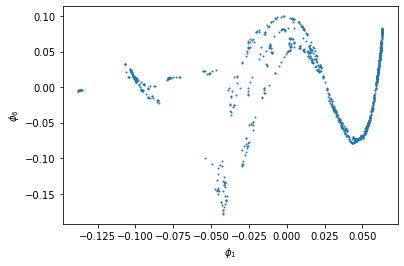

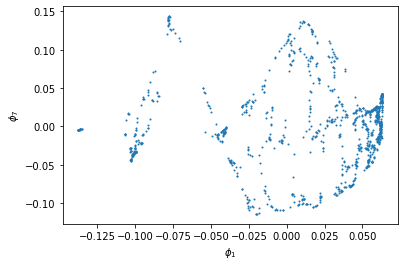

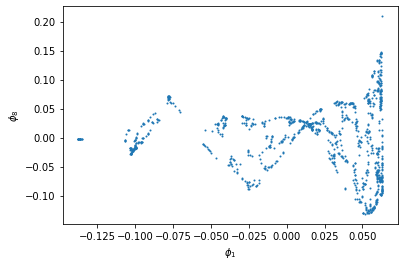

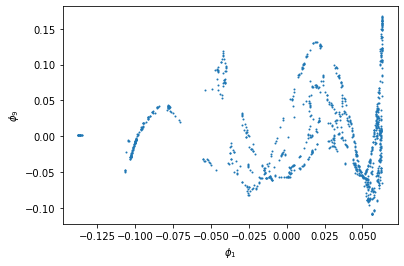

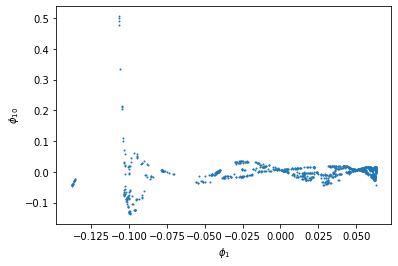

In [39]:
L = 10
plt.figure()
for i in range(2, L+1):
    plt.scatter(phi[:,1], phi[:,i], s=1)
    plt.xlabel(r"$\phi_1$")
    plt.ylabel(r"$\phi_{%d}$"%i)
    plt.savefig(os.path.join(output_path, "task2_2_1000_vs%d"%i))
    plt.show()

#### 3 Components PCA, N=5000

In [40]:
N = 5000
X, t = make_swiss_roll(N, random_state=118010142)
X = X - X.mean(axis=0)
n, d = X.shape
U, s, Vh = np.linalg.svd(X)

In [41]:
energy = s**2/np.sum(s**2)
energy

array([0.3996584 , 0.31993542, 0.28040618])

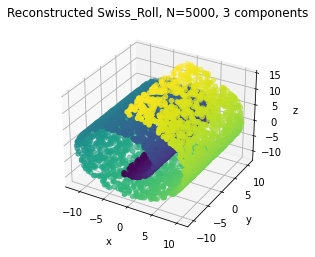

In [42]:
numOfPC = 3
S = np.zeros((n, d))
new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
np.fill_diagonal(S, new_s)

X_proj = U @ S @ Vh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], 'o', c=t)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.title("Reconstructed Swiss_Roll, N=5000, 3 components")
plt.savefig(os.path.join(output_path, "task2_2_pca3_5000"))

plt.show()

#### 2 Components PCA N=5000

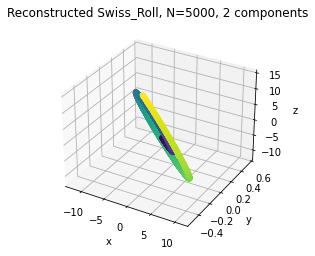

In [43]:
numOfPC = 2
S = np.zeros((n, d))
new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
np.fill_diagonal(S, new_s)

X_proj = U @ S @ Vh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], 'o', c=t)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.title("Reconstructed Swiss_Roll, N=5000, 2 components")
plt.savefig(os.path.join(output_path, "task2_2_pca2_5000"))

plt.show()

#### 3 Components PCA, N=1000

In [44]:
N = 1000
X, t = make_swiss_roll(N, random_state=118010142)
X = X - X.mean(axis=0)
n, d = X.shape
U, s, Vh = np.linalg.svd(X)

In [45]:
energy = s**2/np.sum(s**2)
energy

array([0.40476856, 0.32211594, 0.27311549])

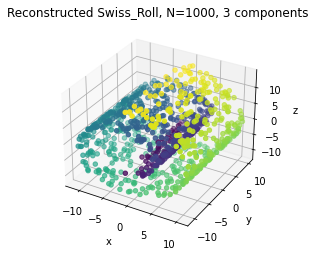

In [46]:
numOfPC = 3
S = np.zeros((n, d))
new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
np.fill_diagonal(S, new_s)

X_proj = U @ S @ Vh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], 'o', c=t)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Reconstructed Swiss_Roll, N=1000, 3 components")
plt.savefig(os.path.join(output_path, "task2_2_pca3_1000"))
plt.show()

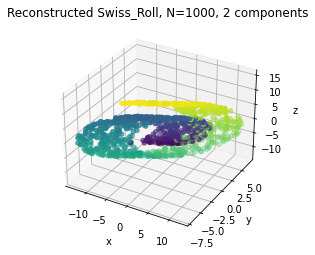

In [47]:
numOfPC = 2
S = np.zeros((n, d))
new_s = np.pad(s[:numOfPC], (0,min(n,d)-numOfPC), 'constant', constant_values=(0,0))
np.fill_diagonal(S, new_s)

X_proj = U @ S @ Vh

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], 'o', c=t)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Reconstructed Swiss_Roll, N=1000, 2 components")
plt.savefig(os.path.join(output_path, "task2_2_pca2_1000"))
plt.show()